In [1]:
#################################################################
# Import libraries
#################################################################
import random
import string

# Modelling
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
# import graphviz

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import os
import re
import sys
from sklearn.svm import SVC
from sklearn.cluster import SpectralClustering
from sklearn.metrics import normalized_mutual_info_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from qboost.qboost import QBoostClassifier
from dwave.system.samplers import DWaveSampler
import time
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from dwave.system.composites import EmbeddingComposite
import time
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from datetime import datetime
from sklearn.metrics import classification_report
from sklearn import metrics

# import psycopg2
# from psycopg2.extras import RealDictCursor
from imblearn.under_sampling import RandomUnderSampler
from timeit import default_timer as timer
from datetime import *
from collections import Counter
from connect import connect

# Garbage collection
import gc

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from numpy import mean

from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, f1_score
from collections import Counter


In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 50)

In [3]:
import seaborn as sns

In [4]:
gc.collect()

0

In [5]:
def loadData(path):
    data = pd.read_csv(path)
    # print(data)
    return data

In [7]:
# path = '../../../Dataset/IoT Intrusion Dataset/IoT Network Intrusion Dataset.csv'
path = '../data/mqtt_train70_reduced.csv'

In [ ]:
dataframe =  loadData(path)

In [8]:
df = dataframe

### Data cleaning
#### 1. Remove all columns which have more than 75% data missing. Check against NaN values.
#### 2. Remove all columns which have (-)ve correlation with the target value
#### 3. Remove all columns which have 0 correlation
#### 4. Remove all columns which have corellation at the 1000th position

#### Find non-numeric features

In [9]:
non_numeric_columns = df.select_dtypes(exclude=[int, float]).columns.tolist()
print(non_numeric_columns)

['Flow_ID', 'Src_IP', 'Dst_IP', 'Timestamp', 'Label', 'Cat', 'Sub_Cat']


In [10]:
dataframe.head()

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Bwd_Pkt_Len_Mean,Bwd_Pkt_Len_Std,Flow_Byts/s,Flow_Pkts/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Tot,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd_Header_Len,Bwd_Header_Len,Fwd_Pkts/s,Bwd_Pkts/s,Pkt_Len_Min,Pkt_Len_Max,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,URG_Flag_Cnt,CWE_Flag_Count,ECE_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Fwd_Byts/b_Avg,Fwd_Pkts/b_Avg,Fwd_Blk_Rate_Avg,Bwd_Byts/b_Avg,Bwd_Pkts/b_Avg,Bwd_Blk_Rate_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Pkts,Subflow_Bwd_Byts,Init_Fwd_Win_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,982.0,1430.0,982.0,982.0,982.0,0.000000,1430.0,1430.0,1430.000000,0.000000,3.216000e+07,26666.666667,75.0,0.000000,75.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,0,0,0,8,8,13333.333333,13333.333333,982.0,1430.0,1280.666667,258.652921,66901.333333,0,0,0,0,0,0,0,0,1.0,1921.000000,982.0,1430.000000,0,0,0,0,0,0,1,982,1,1430,-1,-1,1,0,0.0,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,Anomaly,Mirai,Mirai-Ackflooding
1,192.168.0.13-222.160.179.132-554-2179-6,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310,1,2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000e+00,564.971751,2655.0,2261.327486,4254.0,1056.0,0.0,0.0,0.0,0.0,0.0,5310.0,5310.0,0.000000,5310.0,5310.0,0,0,0,0,20,44,188.323917,376.647834,0.0,0.0,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,0,2.0,0.000000,0.0,0.000000,0,0,0,0,0,0,1,0,2,0,-1,14600,0,0,0.0,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,Anomaly,DoS,DoS-Synflooding
2,192.168.0.13-192.168.0.16-9020-52727-6,192.168.0.16,52727,192.168.0.13,9020,6,11/07/2019 01:24:48 AM,141,0,3,0.0,2806.0,0.0,0.0,0.0,0.000000,1388.0,30.0,935.333333,784.041666,1.990071e+07,21276.595745,70.5,0.707107,71.0,70.0,0.0,0.0,0.0,0.0,0.0,141.0,70.5,0.707107,71.0,70.0,0,0,0,0,0,96,0.000000,21276.595745,30.0,1388.0,1048.500000,679.000000,461041.000000,0,0,0,0,1,0,0,0,0.0,1398.000000,0.0,935.333333,0,0,0,0,0,0,0,0,3,2806,-1,1869,0,0,0.0,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,Anomaly,Scan,Scan Port OS
3,192.168.0.13-192.168.0.16-9020-52964-6,192.168.0.16,52964,192.168.0.13,9020,6,04/09/2019 03:58:17 AM,151,0,2,0.0,2776.0,0.0,0.0,0.0,0.000000,1388.0,1388.0,1388.000000,0.000000,1.838411e+07,13245.033113,151.0,0.000000,151.0,151.0,0.0,0.0,0.0,0.0,0.0,151.0,151.0,0.000000,151.0,151.0,0,0,0,0,0,64,0.000000,13245.033113,1388.0,1388.0,1388.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0.0,2082.000000,0.0,1388.000000,0,0,0,0,0,0,0,0,2,2776,-1,1869,0,0,0.0,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,Anomaly,Mirai,Mirai-Hostbruteforceg
4,192.168.0.1-239.255.255.250-36763-1900-17,192.168.0.1,36763,239.255.255.250,1900,17,10/09/2019 01:41:18 AM,153,2,1,886.0,420.0,452.0,434.0,443.0,12.727922,420.0,420.0,420.000000,0.000000,8.535948e+06,19607.843137,76.5,0.707107,77.0,76.0,76.0,76.0,0.0,76.0,76.0,0.0,0.0,0.000000,0.0,0.0,0,0,0,0,16,8,13071.895425,6535.947712,420.0,452.0,431.500000,15.176737,230.333333,0,0,0,0,0,0,0,0,0.0,575.333333,443.0,420.000000,0,0,0,0,0,0,2,886,1,420,-1,-1,2,0,0.0,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,Anomaly,Mirai,Mirai-Hostbruteforceg


In [11]:
df.head()

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Bwd_Pkt_Len_Mean,Bwd_Pkt_Len_Std,Flow_Byts/s,Flow_Pkts/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Tot,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd_Header_Len,Bwd_Header_Len,Fwd_Pkts/s,Bwd_Pkts/s,Pkt_Len_Min,Pkt_Len_Max,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,URG_Flag_Cnt,CWE_Flag_Count,ECE_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Fwd_Byts/b_Avg,Fwd_Pkts/b_Avg,Fwd_Blk_Rate_Avg,Bwd_Byts/b_Avg,Bwd_Pkts/b_Avg,Bwd_Blk_Rate_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Pkts,Subflow_Bwd_Byts,Init_Fwd_Win_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,982.0,1430.0,982.0,982.0,982.0,0.000000,1430.0,1430.0,1430.000000,0.000000,3.216000e+07,26666.666667,75.0,0.000000,75.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,0,0,0,8,8,13333.333333,13333.333333,982.0,1430.0,1280.666667,258.652921,66901.333333,0,0,0,0,0,0,0,0,1.0,1921.000000,982.0,1430.000000,0,0,0,0,0,0,1,982,1,1430,-1,-1,1,0,0.0,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,Anomaly,Mirai,Mirai-Ackflooding
1,192.168.0.13-222.160.179.132-554-2179-6,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310,1,2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000e+00,564.971751,2655.0,2261.327486,4254.0,1056.0,0.0,0.0,0.0,0.0,0.0,5310.0,5310.0,0.000000,5310.0,5310.0,0,0,0,0,20,44,188.323917,376.647834,0.0,0.0,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,0,2.0,0.000000,0.0,0.000000,0,0,0,0,0,0,1,0,2,0,-1,14600,0,0,0.0,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,Anomaly,DoS,DoS-Synflooding
2,192.168.0.13-192.168.0.16-9020-52727-6,192.168.0.16,52727,192.168.0.13,9020,6,11/07/2019 01:24:48 AM,141,0,3,0.0,2806.0,0.0,0.0,0.0,0.000000,1388.0,30.0,935.333333,784.041666,1.990071e+07,21276.595745,70.5,0.707107,71.0,70.0,0.0,0.0,0.0,0.0,0.0,141.0,70.5,0.707107,71.0,70.0,0,0,0,0,0,96,0.000000,21276.595745,30.0,1388.0,1048.500000,679.000000,461041.000000,0,0,0,0,1,0,0,0,0.0,1398.000000,0.0,935.333333,0,0,0,0,0,0,0,0,3,2806,-1,1869,0,0,0.0,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,Anomaly,Scan,Scan Port OS
3,192.168.0.13-192.168.0.16-9020-52964-6,192.168.0.16,52964,192.168.0.13,9020,6,04/09/2019 03:58:17 AM,151,0,2,0.0,2776.0,0.0,0.0,0.0,0.000000,1388.0,1388.0,1388.000000,0.000000,1.838411e+07,13245.033113,151.0,0.000000,151.0,151.0,0.0,0.0,0.0,0.0,0.0,151.0,151.0,0.000000,151.0,151.0,0,0,0,0,0,64,0.000000,13245.033113,1388.0,1388.0,1388.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0.0,2082.000000,0.0,1388.000000,0,0,0,0,0,0,0,0,2,2776,-1,1869,0,0,0.0,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,Anomaly,Mirai,Mirai-Hostbruteforceg
4,192.168.0.1-239.255.255.250-36763-1900-17,192.168.0.1,36763,239.255.255.250,1900,17,10/09/2019 01:41:18 AM,153,2,1,886.0,420.0,452.0,434.0,443.0,12.727922,420.0,420.0,420.000000,0.000000,8.535948e+06,19607.843137,76.5,0.707107,77.0,76.0,76.0,76.0,0.0,76.0,76.0,0.0,0.0,0.000000,0.0,0.0,0,0,0,0,16,8,13071.895425,6535.947712,420.0,452.0,431.500000,15.176737,230.333333,0,0,0,0,0,0,0,0,0.0,575.333333,443.0,420.000000,0,0,0,0,0,0,2,886,1,420,-1,-1,2,0,0.0,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,Anomaly,Mirai,Mirai-Hostbruteforceg


In [12]:
df['Label'].unique()

array(['Anomaly', 'Normal'], dtype=object)

In [13]:
df['Label'].value_counts()['Normal']

40073

In [14]:
df['Label'].value_counts()['Anomaly']

585710

#### Remove the Target Variable / Dependent Variable from the non-numeric columns list

In [15]:
# Label is non numeric but it is the dependent variable; 
# need for future data processing, remove it from the non numeric column list
non_numeric_columns.remove('Label')

In [16]:
non_numeric_columns

['Flow_ID', 'Src_IP', 'Dst_IP', 'Timestamp', 'Cat', 'Sub_Cat']

#### Remove non numeric columns from the dataset, but keeping the 'Label'

In [17]:
df = df.drop(columns=non_numeric_columns)

#### Change "Label" from text to numbers

In [18]:
df['Label'] = df['Label'].replace('Anomaly', -1).replace('Normal', 1)

#### Find out the datatypes of the columns in the dataframe

In [19]:
column_info = df.dtypes
print(column_info)

Src_Port           int64
Dst_Port           int64
Protocol           int64
Flow_Duration      int64
Tot_Fwd_Pkts       int64
                  ...   
Idle_Mean        float64
Idle_Std         float64
Idle_Max         float64
Idle_Min         float64
Label              int64
Length: 80, dtype: object


#### Find out the columns which have NaN / Missing values - None here

In [20]:
nan_values = df.columns[df.isna().any()]

In [21]:
nan_values

Index([], dtype='object')

#### Find out the columns where all values are equal -> does not contribute to the result

In [22]:
columns_with_same_val = df.columns[(df == df.iloc[0]).all()]

In [23]:
columns_with_same_val

Index(['Fwd_PSH_Flags', 'Fwd_URG_Flags', 'Fwd_Byts/b_Avg', 'Fwd_Pkts/b_Avg',
       'Fwd_Blk_Rate_Avg', 'Bwd_Byts/b_Avg', 'Bwd_Pkts/b_Avg',
       'Bwd_Blk_Rate_Avg', 'Init_Fwd_Win_Byts', 'Fwd_Seg_Size_Min'],
      dtype='object')

In [24]:
df = df.drop(columns=columns_with_same_val)

In [25]:
df.head()

,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Bwd_Pkt_Len_Mean,Bwd_Pkt_Len_Std,Flow_Byts/s,Flow_Pkts/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Tot,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Bwd_PSH_Flags,Bwd_URG_Flags,Fwd_Header_Len,Bwd_Header_Len,Fwd_Pkts/s,Bwd_Pkts/s,Pkt_Len_Min,Pkt_Len_Max,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,URG_Flag_Cnt,CWE_Flag_Count,ECE_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Pkts,Subflow_Bwd_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
0,10000,10101,17,75,1,1,982.0,1430.0,982.0,982.0,982.0,0.000000,1430.0,1430.0,1430.000000,0.000000,3.216000e+07,26666.666667,75.0,0.000000,75.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,0,8,8,13333.333333,13333.333333,982.0,1430.0,1280.666667,258.652921,66901.333333,0,0,0,0,0,0,0,0,1.0,1921.000000,982.0,1430.000000,1,982,1,1430,-1,1,0.0,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,-1
1,2179,554,6,5310,1,2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000e+00,564.971751,2655.0,2261.327486,4254.0,1056.0,0.0,0.0,0.0,0.0,0.0,5310.0,5310.0,0.000000,5310.0,5310.0,0,0,20,44,188.323917,376.647834,0.0,0.0,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,0,2.0,0.000000,0.0,0.000000,1,0,2,0,14600,0,0.0,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,-1
2,52727,9020,6,141,0,3,0.0,2806.0,0.0,0.0,0.0,0.000000,1388.0,30.0,935.333333,784.041666,1.990071e+07,21276.595745,70.5,0.707107,71.0,70.0,0.0,0.0,0.0,0.0,0.0,141.0,70.5,0.707107,71.0,70.0,0,0,0,96,0.000000,21276.595745,30.0,1388.0,1048.500000,679.000000,461041.000000,0,0,0,0,1,0,0,0,0.0,1398.000000,0.0,935.333333,0,0,3,2806,1869,0,0.0,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,-1
3,52964,9020,6,151,0,2,0.0,2776.0,0.0,0.0,0.0,0.000000,1388.0,1388.0,1388.000000,0.000000,1.838411e+07,13245.033113,151.0,0.000000,151.0,151.0,0.0,0.0,0.0,0.0,0.0,151.0,151.0,0.000000,151.0,151.0,0,0,0,64,0.000000,13245.033113,1388.0,1388.0,1388.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0.0,2082.000000,0.0,1388.000000,0,0,2,2776,1869,0,0.0,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,-1
4,36763,1900,17,153,2,1,886.0,420.0,452.0,434.0,443.0,12.727922,420.0,420.0,420.000000,0.000000,8.535948e+06,19607.843137,76.5,0.707107,77.0,76.0,76.0,76.0,0.0,76.0,76.0,0.0,0.0,0.000000,0.0,0.0,0,0,16,8,13071.895425,6535.947712,420.0,452.0,431.500000,15.176737,230.333333,0,0,0,0,0,0,0,0,0.0,575.333333,443.0,420.000000,2,886,1,420,-1,2,0.0,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,-1


#### Find out the max values from each column to avoid 'inf' -> infinity value problem

In [26]:
df.max(axis=0)

Src_Port         65500.000000
Dst_Port         65371.000000
Protocol            17.000000
Flow_Duration    99984.000000
Tot_Fwd_Pkts       186.000000
                     ...     
Idle_Mean        99973.000000
Idle_Std         67071.906623
Idle_Max         99973.000000
Idle_Min         99973.000000
Label                1.000000
Length: 70, dtype: float64

##### Some columns above have Infinity value and cannot be processed as it is, so they need to be replaced with NaN and then imputed

#### Replacing Infinity values with NaN

In [27]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

#### Imputing using median for outliers

In [28]:
df.fillna(df.median(), inplace=True)

#### Separate Dependent and Independent columns

In [29]:
shp = df.shape
cols = list(df.columns.values)

In [30]:
X = df[cols[0:shp[1]-1]]

In [67]:
y = df['Label']

In [32]:
X.head(), y.head()

(   Src_Port  Dst_Port  Protocol  Flow_Duration  Tot_Fwd_Pkts  Tot_Bwd_Pkts  \
 0     10000     10101        17             75             1             1   
 1      2179       554         6           5310             1             2   
 2     52727      9020         6            141             0             3   
 3     52964      9020         6            151             0             2   
 4     36763      1900        17            153             2             1   
 
    TotLen_Fwd_Pkts  TotLen_Bwd_Pkts  Fwd_Pkt_Len_Max  Fwd_Pkt_Len_Min  \
 0            982.0           1430.0            982.0            982.0   
 1              0.0              0.0              0.0              0.0   
 2              0.0           2806.0              0.0              0.0   
 3              0.0           2776.0              0.0              0.0   
 4            886.0            420.0            452.0            434.0   
 
    Fwd_Pkt_Len_Mean  Fwd_Pkt_Len_Std  Bwd_Pkt_Len_Max  Bwd_Pkt_Len_Min  \
 0 

### Feature selection using PCA

#### Clear memory by clearing variables

In [33]:
# %reset

#### Preprocess the data by scaling the features

In [34]:
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

# Use MinMaxScaler
scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X)

In [35]:
scaled_X

array([[1.52671756e-01, 1.54518058e-01, 1.00000000e+00, ...,
        0.00000000e+00, 7.50202555e-04, 7.50202555e-04],
       [3.32671756e-02, 8.47470591e-03, 3.52941176e-01, ...,
        3.37149725e-02, 4.25514889e-02, 1.05628520e-02],
       [8.04992366e-01, 1.37981674e-01, 3.52941176e-01, ...,
        1.05425180e-05, 7.10191752e-04, 7.00189051e-04],
       ...,
       [8.05175573e-01, 1.37981674e-01, 3.52941176e-01, ...,
        0.00000000e+00, 7.70207956e-04, 7.70207956e-04],
       [1.37709924e-01, 7.61560937e-01, 3.52941176e-01, ...,
        1.05425180e-04, 1.25033759e-03, 1.15031058e-03],
       [1.52671756e-01, 1.54518058e-01, 1.00000000e+00, ...,
        4.84955827e-04, 1.22032949e-03, 7.60205255e-04]])

#### Perform PCA

In [36]:
pca = PCA()
pca.fit(scaled_X)

PCA()

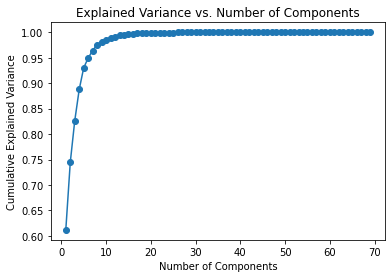

In [37]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.show()

#### Finding the best number of components by Elbow method

In [38]:
# Calculate the difference in explained variance between components
explained_variance_diff = np.diff(explained_variance)

# Find the index of the elbow point (maximum difference)
elbow_index = np.argmax(explained_variance_diff) + 1

print("Number of components at the elbow point:", elbow_index)

Number of components at the elbow point: 63


#### Find the best number of components by the Threshold method

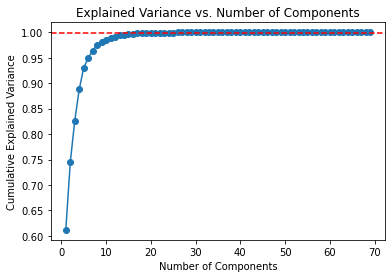

Number of components above the threshold: 20


In [39]:
threshold =0.9985  # Define the desired threshold (e.g., 99% variance explained)

# Find the number of components above the threshold
n_components = np.argmax(cumulative_variance >= threshold) + 1

# Plot the threshold line
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o')
plt.axhline(y=threshold, color='r', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.show()

print("Number of components above the threshold:", n_components)

#### From the above mentioned statistical analysis, we see that including more or less 20 components is enough for a variance that levels off

In [52]:
n_components = 20  # Choose the desired number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(scaled_X)

#### Number of Components with impactful positive correlation = 20

In [68]:
y_pca = y

In [91]:
X_pca, y_pca

(array([[ 1.50876870e+00, -5.86619204e-01, -5.28545806e-01, ...,
         -6.30127648e-02,  1.29709539e-02, -4.79797126e-02],
        [-1.39315045e+00, -3.44525176e-01,  4.35592443e-01, ...,
          1.50665166e-02, -7.02715164e-02, -8.82632148e-02],
        [ 2.35335332e-01,  1.32613871e+00, -2.06855559e-01, ...,
         -1.14557806e-01,  6.22960628e-02,  1.46629640e-03],
        ...,
        [-1.24166563e+00,  3.25050351e-01,  4.67760774e-01, ...,
          8.25321095e-03, -1.66384412e-02, -2.46626633e-02],
        [ 2.03212333e+00, -4.51329543e-01,  5.84482781e-01, ...,
         -3.32756364e-02,  3.00113710e-02,  2.25990468e-02],
        [ 1.88796188e+00, -1.08292040e+00, -3.99975308e-01, ...,
         -7.61901601e-03,  1.57546816e-02,  3.05170089e-02]]),
 0        -1
 1        -1
 2        -1
 3        -1
 4        -1
          ..
 625778   -1
 625779   -1
 625780   -1
 625781    1
 625782   -1
 Name: Label, Length: 625783, dtype: int64)

In [ ]:
# for n_components in range(1,25):
#    pca = PCA(n_components=n_components)
#    X_pca = pca.fit_transform(scaled_X)

In [ ]:
# Delete variable
del val

#### The part below is for checking the recall based on the the number of k neighbors used in SMOTE oversampling

In [49]:
# values to evaluate
k_values = [1, 2, 3, 4, 5, 6, 7]
for k in k_values:
    # define pipeline
    model = DecisionTreeClassifier()
    over = SMOTE(sampling_strategy=0.1, k_neighbors=k)
    under = RandomUnderSampler(sampling_strategy=0.5)
    steps = [('over', over), ('under', under), ('model', model)]
    pipeline = Pipeline(steps=steps)
    # evaluate pipeline
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X_pca, y, scoring='recall', cv=cv, n_jobs=-1)
    score = mean(scores)
    print('> k=%d, Mean Recall: %.3f' % (k, score))

> k=1, Mean Recall: 0.989
> k=2, Mean Recall: 0.989
> k=3, Mean Recall: 0.989
> k=4, Mean Recall: 0.989
> k=5, Mean Recall: 0.989
> k=6, Mean Recall: 0.990
> k=7, Mean Recall: 0.989


#### The code below uses the QBoost to find out good parameters for oversampling, and undersampling

In [81]:
def trainQboost(x, y):
    # print('Training QBOOST Model... ')
    qboost = QBoostClassifier(n_estimators=NUM_WEAK_CLASSIFIERS, max_depth=TREE_DEPTH)
    start = timer()
    qboost.fit(x, y, emb_sampler, lmd=lmd, **DW_PARAMS)
    end = timer()
    train_time = end - start
    # print('QBoost training time in seconds :', train_time)
    return qboost, train_time

In [82]:
def predictModel(model, x):
    # print('Prediction on model :', model)
    start = timer()
    predictions = model.predict(x)
    end = timer()
    predict_time = end - start
    return predictions, predict_time

In [80]:
DW_PARAMS = {'num_reads': 3000,
             'auto_scale': True,
             # "answer_mode": "histogram",
             'num_spin_reversal_transforms': 10,
             # 'annealing_time': 10,
             # 'postprocess': 'optimization',
             }
NUM_WEAK_CLASSIFIERS = 35
TREE_DEPTH = 3
dwave_sampler = DWaveSampler(token="DEV-98f903479d1e03bc59d7ba92376a492f76f7c906")
# sa_sampler = micro.dimod.SimulatedAnnealingSampler()
emb_sampler = EmbeddingComposite(dwave_sampler)
lmd = 0.5

In [2]:
y_pca

NameError: name 'y_pca' is not defined

In [93]:
def evaluate_over_under():
    # Nearest neighbor values for SMOTE
    k_values = [1, 2, 3, 4, 5, 6, 7]
    s_values = [0.1, 0.2, 0.3, 0.4, 0.5]
    
    # Create a KFold object with n_splits=10
    # kf = KFold(n_splits=10)
    # precision, recall, f1 = 0, 0, 0
    for s in s_values:
        for k in k_values:
            # Declear the models for SMOTE over and Random Undersampling
            over = SMOTE(sampling_strategy=s, k_neighbors=k)
            under = RandomUnderSampler(sampling_strategy=0.5)
            X, y = over.fit_resample(X_pca, y_pca)
            X, y = under.fit_resample(X, y)
            print(Counter(y))
            count = 0
            x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)
            model, train_time = trainQboost(x_train, y_train)
            predictions, predict_time = predictModel(model, x_test)
            # print('Training Time: %.2f, Prediction Time: %2f' % (train_time, predict_time))
            # Calculate precision
            precision = precision_score(y_test, predictions)
            # Calculate recall
            recall = recall_score(y_test, predictions)
            # Calculate F1-score
            f1 = f1_score(y_test, predictions)
            print('>> s: %3f -> k: %d -> Precision: %.3f, Recall: %.3f, F1_score: %.3f, Training Time: %.2f, Prediction Time: %2f' % 
                  (s, k, precision, recall, f1, train_time, predict_time))
            
            # Iterate over the splits for 10 fold validation
            # for train_index, test_index in kf.split(X, y):
            #     # Obtain the training and testing subsets for the current split
            #     # X_train, X_test = X[train_index], X[test_index]
            #     # y_train, y_test = y[train_index], y[test_index]
            #     model, train_time = trainQboost(X[train_index], y[train_index])
            #     predictions, predict_time = predictModel(model, X[test_index])
            #     print('Training Time: %.2f, Prediction Time: %2f' % (train_time, predict_time))
            #     # Calculate precision
            #     precision = precision + precision_score(y[test_index], predictions)
            #     print('Precision: %.3f' % precision)
            #     # Calculate recall
            #     print('Precision: %.3f' % precision)
            #     recall = recall + recall_score(y[test_index], predictions)
            #     # Calculate F1-score
            #     f1 = f1 + f1_score(y[test_index], predictions)
            #     count = count + 1 
            # print('> k=%d, Mean Precision: %.3f, Recall: %.3f, F1-Score: %3f' % (k, precision/count, recall/count, f1/count))    
        

In [94]:
evaluate_over_under()

Counter({-1: 117142, 1: 58571})
>> s: 0.100000 -> k: 1 -> Precision: 0.998, Recall: 0.906, F1_score: 0.950, Training Time: 47.83, Prediction Time: 0.106257
Counter({-1: 117142, 1: 58571})
>> s: 0.100000 -> k: 2 -> Precision: 0.998, Recall: 0.849, F1_score: 0.917, Training Time: 28.04, Prediction Time: 0.078973
Counter({-1: 117142, 1: 58571})
>> s: 0.100000 -> k: 3 -> Precision: 0.996, Recall: 0.855, F1_score: 0.920, Training Time: 27.77, Prediction Time: 0.076924
Counter({-1: 117142, 1: 58571})
>> s: 0.100000 -> k: 4 -> Precision: 0.990, Recall: 0.840, F1_score: 0.909, Training Time: 26.01, Prediction Time: 0.077667
Counter({-1: 117142, 1: 58571})
>> s: 0.100000 -> k: 5 -> Precision: 0.984, Recall: 0.936, F1_score: 0.959, Training Time: 27.10, Prediction Time: 0.078965
Counter({-1: 117142, 1: 58571})
>> s: 0.100000 -> k: 6 -> Precision: 0.999, Recall: 0.875, F1_score: 0.933, Training Time: 27.45, Prediction Time: 0.555284
Counter({-1: 117142, 1: 58571})
>> s: 0.100000 -> k: 7 -> Precis

In [88]:
print(Counter(y_pca))

Counter({-1: 585710, 1: 40073})


In [77]:
(40073/585710)*100

6.841781769134895

In [1]:
(292855/585710)*100

50.0

#### Apply QBoost

In [139]:
def reportResult(y, predictions, model, predict_type, train_time, predict_time):
    print("Reporting Result ...")
    result_time = datetime.now().strftime("%Y%m%d%H%M%S")
    report = classification_report(y, predictions)
    with open('../results/' + str(result_time) + '_' + str(model) + '_' + str(predict_type) + '_report.txt', 'a') as f:
        f.write('Training time :' + str(train_time) + '\n')
        f.write(report)
        f.write('Prediction time :' + str(predict_time) + '\n')
    f.close()
    print("Saved...")

In [123]:
x_train, x_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, shuffle=True, random_state=32)

In [141]:
model, train_time = trainQboost(x_train, y_train)

Training QBOOST Model... 
QBoost training time in seconds : 101.91501472401433


In [142]:
predictions, predict_time = predictModel(model, x_train)

Prediction on model : <qboost.qboost.QBoostClassifier object at 0x7fca744ddc40>


In [143]:
reportResult(y_train, predictions, str(model)[1:4], 'training', train_time, predict_time)

Reporting Result ...
Saved...


In [144]:
predictions, predict_time = predictModel(model, x_test)

Prediction on model : <qboost.qboost.QBoostClassifier object at 0x7fca744ddc40>


In [145]:
reportResult(y_test, predictions, str(model)[1:4], 'test', train_time, predict_time)

Reporting Result ...
Saved...


In [51]:
print(sys.getsizeof(df))

350438624


## The part below is for scratch work

### Correlation Matrix study

In [ ]:
correlation_matrix = df.corr()

In [ ]:
correlation_matrix

In [ ]:
cm = correlation_matrix

In [ ]:
cm

In [ ]:
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix')
# plt.show()

In [ ]:
single_feature_correlation = correlation_matrix['Label']

In [ ]:
single_feature_correlation

In [ ]:
# Select NaN values
nan_values = single_feature_correlation[single_feature_correlation.isnull()]

In [ ]:
nan_values

In [ ]:
X['Flow_Byts/s']